In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import cmasher
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os
import calendar

In [4]:
def plot_500mb_heights_winds(day, hour):
    '''Creates a Cartopy plot of 500mb heights in the current search domain for the research project. 
    Any hour from 1/1/79 to 12/31/23 can be requested.

    Parameters: 
    - day --> the day you want to plot in the format yyyy_mm_dd
    - hour --> the hour of that day (in UTC) you want to plot.'''

    #The directory to pull files from
    data_directory = r"X:\dewhirst\era5_files"

    #Convert meters per second to knots
    ms_to_knots = 1.94384449

    #loop through the directory and get height, wind, and ivt data from files that match the desired field and day.
    '''for filename in os.listdir(data_directory):
        if f'geopotential_{day}' in filename:
            heights_file = xr.open_dataset(os.path.join(data_directory, filename))
            heights_data = heights_file.sel(latitude = slice(55,15), longitude = slice(255, 300))
            gph = heights_data['z'][hour]/9.81
            lats = heights_data['latitude']
            lons = heights_data['longitude']
        
        if f'u_component_of_wind_{day}' in filename:
            u_file = xr.open_dataset(os.path.join(data_directory, filename))
            u_data = u_file.sel(latitude = slice(55,15), longitude = slice(255, 300))
            u = u_data['u'][hour]*ms_to_knots
                                     
        if f'v_component_of_wind_{day}' in filename:
            v_file = xr.open_dataset(os.path.join(data_directory, filename))
            v_data = v_file.sel(latitude = slice(55,15), longitude = slice(255, 300))
            v = v_data['v'][hour]*ms_to_knots'''

    filename1 = f''

    #Get the name of the month from the day specified to use to search for the correct geopotential height climatology.
    #The other parts of the date string will be used in the title of the figure.
    day_parts = day.split('_')
    year = day_parts[0]
    month = int(day_parts[1])
    day = day_parts[2]
    month_name = calendar.month_name[month].lower()
    
    #Calculate the magnitudes of wind and ivt
    winds = np.sqrt(u**2 + v**2)
    
    #Create the figure for the cartopy plot, specify the projection
    projection = ccrs.PlateCarree(central_longitude = 0)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(111, projection = projection)

    Lons, Lats = np.meshgrid(lons, lats)
    
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth = 0.5, edgecolor = 'black', zorder = 1)
    ax.add_feature(cfeature.LAKES, linewidth = 0.5, edgecolor = 'black', zorder = 2)
    ax.add_feature(cfeature.OCEAN, linewidth = 0.5, edgecolor = 'black', zorder = 1)
    ax.add_feature(cfeature.STATES, linewidth = 0.5, edgecolor = 'black', zorder = 2)

    #For the wind barbs
    spacing = 14

    #Add grid lines for latitude and longitude
    grid_lines = ax.gridlines(draw_labels = True, xlocs = [-100, -90, -80, -70, -60], ylocs = [20, 30, 40, 50], linestyle = '--', color = 'white', zorder = 3)
    grid_lines.xlabel_style = {'size': 10, 'color': 'black'}
    grid_lines.ylabel_style = {'size': 10, 'color': 'black'}

    #Get rid of grid line labels on the top and right of the plot
    grid_lines.top_labels = False 
    grid_lines.right_labels = False 
                
    #Subsample each field, besides heights, for barbs and quivers
    sub_lats = Lats[::spacing, ::spacing]
    sub_lons = Lons[::spacing, ::spacing]
    sub_u = u[::spacing, ::spacing]
    sub_v = v[::spacing, ::spacing]

    #Setup the height contours, colors, and colorbar
    cf1 = ax.contourf(lons, lats, gph, cmap = cmasher.voltage, zorder = 1)
    cbar1 = plt.colorbar(cf1, pad = 0.01, shrink = 0.75)
    cl1 = ax.contour(cf1, colors = 'k', linewidths = 0.5, zorder = 1)
    cbar1.add_lines(cl1)
    cbar1.set_label("Height (m)") 
    ax.set_title(f'500mb Heights and Winds (knots) on {month_name.capitalize()} {day}, {year} at {hour:02d}z')
    ax.barbs(sub_lons, sub_lats, sub_u, sub_v, color = 'white', zorder = 2)

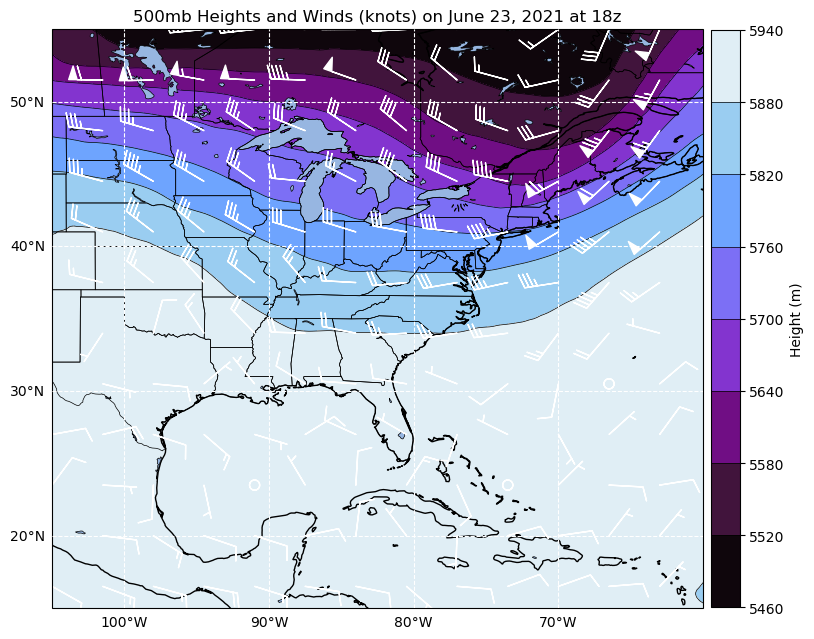

In [33]:
plot_500mb_heights_winds('2021_06_23', 18)